# Machine Learning with Python

[Based on this Cognitive Class Course](https://cognitiveclass.ai/courses/machine-learning-with-python/)

## Labs

The Labs for the course are located in the `Labs` folder are from CognitiveClass and are licensed under MIT

## Intro to ML

Machine learning is a field of computer science that gives computers the ability to learn without being explicitly progammed

Some popular techniques are:

- *Regression* for predicting continuous values
- *Classification* for predicting a class/category
- *Clustering* for finding structure of data and summarization
- *Associations* for finding items/events that co-occur
- *Anomaly detection* is used for finding abnormal/unusual cases
- *Sequence mining* is for predicting next values
- *Dimension reduction* for reducing the size of data
- *Recommendation systems*

We have a few different buzzwords

- AI
    - Computer Vision
    - Language processing
    - Creativity
- Machine learning
    - Field of AI
    - Experience based
    - Classification
    - Clustering
    - Neural Networks
- Deep Learning
    - Specialized case of ML
    - More automation than most ML

### Python for Machine Learning

Python has many different libraries for machine learning such as

- NumPy
- SciPy
- Matplotlib
- Pandas
- Scikit Learn
 
### Supervised vs Unsupervised

Supervised learning involves us supervising a machine learning model. We do this by teaching the model with a labelled dataset

There are two types of supervised learning, namely Classification and Regression

Unsupervised learning is when the model works on its own to discover information about data using techniques such as Dimension Reduction, Density Estimation, Market Basket Analysis, and Clustering


- Supervised
    - Classification
    - Regression
    - More evaluation methods
    - Controlled environment
- Unsupervised
     - Clustering
     - Fewer evaluation methods
     - Less controlled environment
 

## Regression

Regression makes use of two different variables

- Dependent - Predictors $X$
- Independent - Target $Y$

With Regression our $X$ values need to be continuous, but the $Y$ values can be either continuous, discrete, or categorical

There are two types of regression:

- Simple Regression
    - Simple Linear Regression
    - Simple Non-Linear Regression
    - Single $X$
- Multiple Regression
    - Multiple Linear Regression
    - Multiple Non-Linear Regression
    - Multiple $X$

Regression is used when we have continuous data and is well suited to predicting  continuous data

There are many regression algorithms such as

- Ordinal regression
- Poisson regression
- Fast forest quartile regression
- Linear, polynomial, lasso, stepwise, and ridge regression
- Bayesian linear regression
- Neural network regression
- Decision forest regression
- Boosted decision tree regression
- K nearest neighbors (KNN)

Each of which are better suited to some circumstances than to others

### Simple Linear Regression

In SLR we have two variables, one dependent, and one independent. The target variable ($y$) can be either be continuous or categorical, but the predictor ($x$) must be continuous

To get a better idea of whether SLR is appropriate we can simply do a plot of $x$ vs $y$ and find the line which will be the best fit for the data

The line is represented by the following equation

$$
y=\theta_0+\theta_1x_1
$$

The aim of SLE is to adjust the $\theta$ values to minimize the residual error in our data and find the best fit

$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$

#### Estimating Parameters

We have two options to estimate our parameters, given an SLR problem

Estimate $\theta_0$ and $\theta_1$ using the following equations

$$
\theta_1 = \frac{\Sigma_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\Sigma_{i=1}^n(x_i-\bar x)^2}
$$

$$
\theta_0=\bar y-\theta_1\bar x
$$

We can use these values to make predictions with the equation

$$
\hat y=\theta_0+\theta_1x_1
$$

#### Pros

- Fast
- Easy to Understand
- No tuning needed

#### Lab
##### Import Necessary Libraries

In [1]:
%reset -f
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

##### Import Data

In [2]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


##### Data Exploration

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


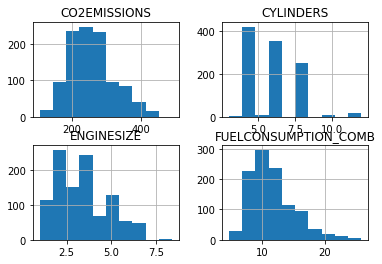

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

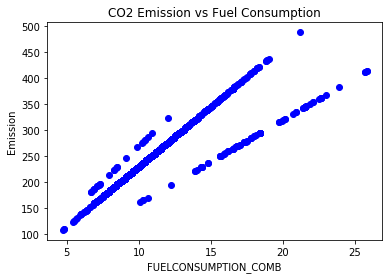

In [6]:
plt.title('CO2 Emission vs Fuel Consumption')
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

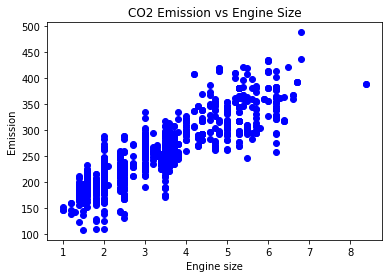

In [7]:
plt.title('CO2 Emission vs Engine Size')
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

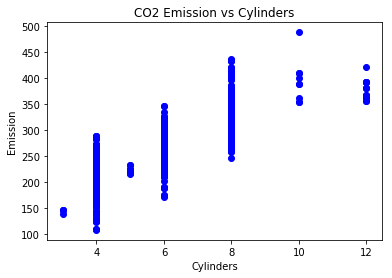

In [8]:
plt.title('CO2 Emission vs Cylinders')
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

##### Test-Train Split

We need to split our data into a test set and a train set

In [9]:
tt_mask = np.random.rand(len(df)) < 0.8
train = cdf[tt_mask].reset_index()
test = cdf[~tt_mask].reset_index()

##### Simple Regression Model

We can look at the distribution of the Engine Size in our training and test set respectively as follows

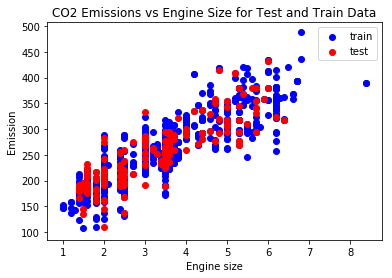

In [10]:
plt.title('CO2 Emissions vs Engine Size for Test and Train Data')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,color='red',label='test')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Modeling

In [11]:
from sklearn import linear_model

In [12]:
lin_reg = linear_model.LinearRegression()
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

test_x = test[['ENGINESIZE']]
test_y = test[['CO2EMISSIONS']]

In [13]:
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
'Coefficients: ' + str(lin_reg.coef_) + ' Intercept: ' + str(lin_reg.intercept_)

'Coefficients: [[ 39.07852834]] Intercept: [ 125.2334158]'

We can plot the line on our data to see the fit

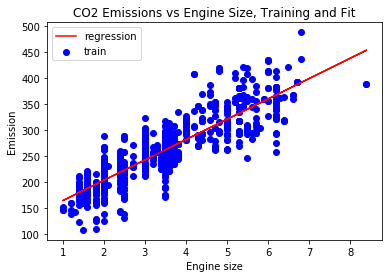

In [15]:
plt.title('CO2 Emissions vs Engine Size, Training and Fit')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue',label='train')
plt.plot(train_x, lin_reg.coef_[0,0]*train_x + lin_reg.intercept_[0],color='red',label='regression')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

##### Model Evaluation

###### Import Packages

In [16]:
from sklearn.metrics import r2_score

###### Predict the CO2 Emissions

In [17]:
predicted_y = lin_reg.predict(test_x)

###### Display Results

In [18]:
results = pd.DataFrame()

results[['ENGINESIZE']] = test_x
results[['ACTUALCO2']] = test_y
results[['PREDICTEDCO2']] = pd.DataFrame(predicted_y)
results[['ERROR']] = pd.DataFrame(np.abs(predicted_y - test_y))
results[['SQUAREDERROR']] = pd.DataFrame((predicted_y - test_y)**2)

results.head()

,ENGINESIZE,ACTUALCO2,PREDICTEDCO2,ERROR,SQUAREDERROR
0,2.0,196,203.390472,7.390472,54.619083
1,2.4,221,219.021884,1.978116,3.912944
2,1.5,136,183.851208,47.851208,2289.738136
3,5.9,359,355.796733,3.203267,10.260920
4,2.0,214,203.390472,10.609528,112.562074


###### Model Evaluation

In [19]:
MAE = np.mean(results[['ERROR']])
MSE = np.mean(results[['SQUAREDERROR']])
R2  = r2_score(test_y, predicted_y)

print("Mean absolute error: %.2f" % MAE)
print("Residual sum of squares (MSE): %.2f" % MSE)
print("R2-score: %.2f" % R2)

Mean absolute error: 22.75
Residual sum of squares (MSE): 918.35
R2-score: 0.75


### Multiple Linear Regression

In reality multiple independent variables will define a specific target. MLR is simply an extension on the SLR Model

MLR is useful for solving problems such as

- Define the impact of independent variables on effectiveness of prediction
- Predicting the impact of change in a specific variable

MLR makes use of multiple predictors to predict the target value, and is generally of the form


$$
\hat y=\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + ... + \theta_nx_n
$$

$$
\hat y=\theta^TX
$$

$\theta$ is a vector of coefficients which are multiplied by $x$, these are called the parameters or weight vectors, and $x$ is the feature set, the idea with MLR is to predict the best-fit hyperplane for our data

#### Estimating Parameters

We have a few ways to estimate the best parameters, such as

- Ordinary Least Squares
    - Linear algebra
    - Not suited to large datasets
- Gradient Descent
    - Good for large datasets
- Other methods are available to do this as well

#### How Many Variables?

Making use of more variables will generally increase the accuracy of the model, howevre using too many variables without good justification can lead to us overfitting the model

We can make use of categorical variables if we convert them to numerric values

MLR assumes that we have a linear relationship between the dependent and independent variables

### Model Evaluation

We have to perform regression evaluation when building a model

#### Train/Test Joint

We make use of our data to train our model, and then compare the predicted values to the actual values of our model

The error of the model is the average of the actual and predicted values for the model

This approach has a high training accuracy, but a lower out-of-sample accuracy

Aiming for a very high training accuracy can lead to overfitting to the training data resulting in poor out-of-sample data

#### Train/Test Split

We split our data into a portion for testing and a portion for training, these two sets are mutually exclusive and allow us to get a good idea of what our out-of-sample accuracy will be

Generally we would train our data with the testing data afterwards in order to increase our accuracy

##### K-Fold Cross-Validation

This makes use of us splitting the dataset into different pieces, and using every combination of test/train datasets in order to get a more aggregated fit

#### Evaluation Metrics

Evaluation metrics are used to evaluate the performance of a model, metrics provide insight into areas of the model that require attention

##### Errors

In the context of regression, error is the difference between the data points and the valuedetermined by the model

Some of the main error equations are defined below


$$
MAE=\frac{1}{n}\Sigma_{i=1}^n|y_i-\hat y_i|
$$


$$
MSE=\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2
$$


$$
RMSE=\sqrt{\frac{1}{n}\Sigma_{i=1}^n(y_i-\hat y_i)^2}
$$

$$
RAE=\frac{\Sigma_{i=1}^n|y_i-\hat y_i|}{\Sigma_{i=1}^n|y_i-\bar y_i|}
$$

$$
RSE=\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

##### Fit

$R^2$ helps us see how closely our data is represented by a specific regression line, and is defined as

$$
R^2=1-RSE
$$

Or

$$
R^2=1-\frac{\Sigma_{i=1}^n(y_i-\hat y_i)^2}{\Sigma_{i=1}^n(y_i-\bar y_i)^2}
$$

A higher $R^2$ represents a better fit

### Non-Linear Regression

Not all data can be predicted using a linear regression line, we have many diferent regression lines to fit more complex data

#### Polynomial Regression

Polynomial Regression is a method with which we can fit a polynomial to our data, it is still possible for us to define a polynomial regression by transforming it into a multi-variable linear regression problem as follows

Given the polynomial

$$
\hat y=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3
$$

We can create new variables which represent the different powers of our initial variable

$$
x_1=x
$$

$$
x_2=x^2
$$

$$
x_3=x^3
$$

Therefore resulting in the following linear equation

$$
\hat y=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_3
$$

#### Other Non-Linear Regression

Non-Linear Regression can be of many forms as well, including any other mathematical relationships that we can define

For more complex NLR problems it can be difficult to evaluate the parameters for the equation

#### Lab

There are many different model types and equations shown in the Lab Notebook aside from what I have here

##### Import the Data

Using China's GDP data

In [20]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [21]:
x_data, y_data = (df[['Year']], df[['Value']])

##### Plotting the Data

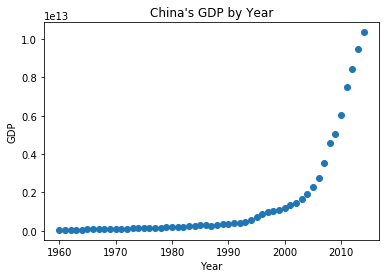

In [22]:
plt.title('China\'s GDP by Year')
plt.plot(x_data, y_data, 'o')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Defining a Fit

Next we can try to approximate a curve that we think will fit the data we have, we can use a sigmoid, as defined below

$$
\hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}
$$

$\beta_1$ : Controls the curve's steepness,

$\beta_2$ : Slides the curve on the x-axis.

In [23]:
def sigmoid(x, b_1, b_2):
     y = 1 / (1 + np.exp(-b_1*(x-b_2)))
     return y

The above function can be seen to be

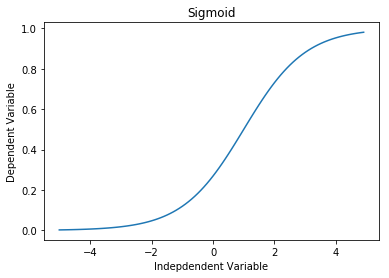

In [24]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X, 1, 1)

plt.title('Sigmoid')
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Next let's try to fit this to the data with some example values

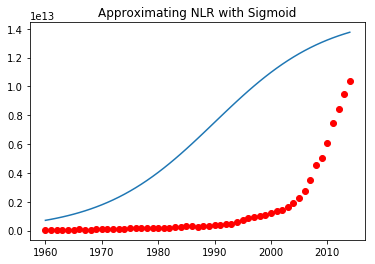

In [25]:
b_1 = 0.10
b_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, b_1 , b_2)

#plot initial prediction against datapoints
plt.title('Approximating NLR with Sigmoid')
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

##### Data Normalization

Let's normalize our data so that we don't need to multiply by crazy numbers as before

In [26]:
# for some reason this seems to be the only way the conversion
# from a dataframe works as desired
# the normalization from the labs are as such:
# xdata =x_data/max(x_data)
# ydata =y_data/max(y_data)
x_norm = (np.array(x_data)/max(np.array(x_data))).transpose()[0]
y_norm = (np.array(y_data)/max(np.array(y_data))).transpose()[0]

##### Finding the Best Fit

Next we can import `curve_fit` to help us fit the the curve to our data

In [27]:
from scipy.optimize import curve_fit

In [28]:
popt, pcov = curve_fit(sigmoid, x_norm, y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
print(popt)
print(pcov)

 beta_1 = 690.453017, beta_2 = 0.997207
[ 690.45301712    0.99720713]
[[  1.52273887e+03  -2.88115957e-04]
 [ -2.88115957e-04   7.25956452e-09]]


And we can plot the result as follows

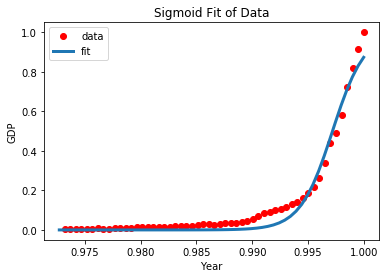

In [29]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

plt.title('Sigmoid Fit of Data')
plt.plot(x_norm, y_norm, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend()
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

##### Model Accuracy

In [30]:
from sklearn.metrics import r2_score

# split data into train/test
mask = np.random.rand(len(df)) < 0.8
train_x = x_norm[mask]
test_x = x_norm[~mask]
train_y = y_norm[mask]
test_y = y_norm[~mask]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.18
Residual sum of squares (MSE): 0.13
R2-score: -122364455678112689020805480185856.00


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


## Classification

Classification is a supervised learning approach which is a means of splitting data into discrete classes

The target atribute is a categorical value with discrete values

Classification will determine the class label for a specific test case

Binary as well as multi-class classification methods are available

### Learning Algorithms

Many learning algorithms are available for classification such as

- Decision trees
- Naive Bayes
- KNN
- Logistic Regression
- Neural Networks
- SVM

### Evaluation Metrics

We have a few different evaluation metrics for classification

#### Jaccard Index

We simply measure which fraction of our predicted values $\hat y$ intersect with the actual values $y$

$$
J(y,\hat y)=\frac{|y\cap\hat y|}{|y\cup\hat y|}=\frac{|y\cap\hat y|}{|y|+|\hat y|-|y\cap\hat y|} 
$$

#### F1 Score

This is a measure which makes use of a confusion matrix and compares the predictions vs actual values for each class

In the count of binary classification this will give us our True Positives, False Positives, True Negatives and False Negatives

We can define some metrics for each class with the following

$$ 
Precision=\frac{TP}{TP+FP}
$$

$$
Recall=\frac{TP}{TP+FN}
$$

$$
F1=2\frac{Precision\times Rcall}{Precision+Recall}
$$

F1 varies between 0 and 1, with 1 being the best

The accuracy for a classifier is the average accuracy of each of its classes

#### Log Loss

The log loss is the performance of a classifier where the predicted output is a probability between 1 and 0


$$
y\cdot log(\hat y)+(1-y)\cdot log(1-\hat y)
$$

Better classifiers have a log loss closer to zero

### K-Nearest Neighbor

KNN is a method of determining class based on the training datapoints that sit near our test datapoint based on the fact that closer datapoints are more important than those further away in predicting a specific value

#### Algorithm

1. Pick a value for K
2. Calculate distance of unknown case from known cases
3. Select k observations
4. Predict the value based on the most common observaton value

We can make use of euclidean distance to calculate the distance between our continuous values, and a voting system for discrete data

Using a low K value can lead to overfitting, and using a very high value can lead to us underfitting

In order to find the optimal K value we do multiple tests by continuously increasing our K value and measuring the accuracy for that K value

Furthermore KNN can also be used to predict continuous values (regression) by simply having a target variable and predictors that are continuous

#### Lab

##### Import Libraries

In [31]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

##### Import Data

The dataset being used is one in which demographic data is used to define a customer service group, these being as follows

| Value | Category      |
| ----- | ------------- |
| 1     | Basic Service |
| 2     | E-Service     |
| 3     | Plus Service  |
| 4     | Total Service |

In [32]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')

In [33]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


##### Data Visualization and Analysis

We can look at the number of customers in each class

In [34]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

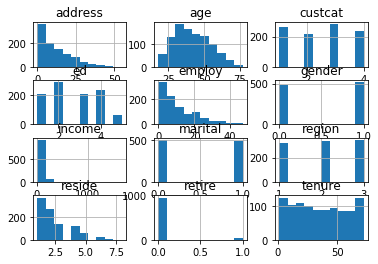

In [35]:
df.hist()
plt.show()

We can take a closer look at income with

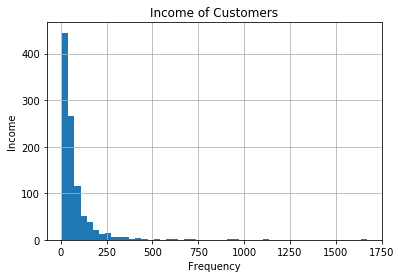

In [36]:
df.income.hist(bins=50)
plt.title('Income of Customers')
plt.xlabel('Frequency')
plt.ylabel('Income')
plt.show()

##### Features

To use `sklearn` we need to convert our data into an array as follows

In [37]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [38]:
# X = df.loc[:, 'region':'reside'].values
# Y = df.loc[:,'custcat'].values
X = df.loc[:, 'region':'reside']
Y = df.loc[:,'custcat']

In [39]:
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [40]:
Y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

##### Normalize Data

For alogrithms like KNN which are distance based it is useful to normalize the data to have a zero mean and unit variance, we can do this using the `sklearn.preprocessing` package

In [41]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


##### Test/Train Split

Next we can split our model into a test and train set using `sklearn.model_selection.train_test_split()`

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
ran = 4
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=ran)

In [44]:
print('Train: ', X_train.shape, Y_train.shape)
print('Test: ', X_test.shape, Y_test.shape)

Train:  (800, 11) (800,)
Test:  (200, 11) (200,)


##### Classification

We can then make use of the KNN classifier on our data

In [45]:
from sklearn.neighbors import KNeighborsClassifier as knn_classifier

We will use an intial value of 4 for k, but will later evaluate different k values

In [46]:
k = 4

In [47]:
knn = knn_classifier(n_neighbors=k)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [48]:
Y_hat = knn.predict(X_test)
print(Y_hat[0:5])

[1 1 3 2 4]


##### Model Evaluation

In [49]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


##### Other K Values

We can do this for additional K values to look at how the accuracy is affected

In [50]:
k_max = 100
mean_acc = np.zeros((k_max))
std_acc = np.zeros((k_max))
ConfustionMx = [];
for n in range(1,k_max + 1):
    
    #Train Model and Predict  
    knn = knn_classifier(n_neighbors = n).fit(X_train,Y_train)
    Y_hat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_hat)

    std_acc[n-1] = np.std(Y_hat == Y_test)/np.sqrt(Y_hat.shape[0])
    
print(mean_acc)

[ 0.3    0.29   0.315  0.32   0.315  0.31   0.335  0.325  0.34   0.33
  0.315  0.34   0.33   0.315  0.34   0.36   0.355  0.35   0.345  0.335
  0.35   0.36   0.37   0.365  0.365  0.365  0.35   0.36   0.38   0.385
  0.395  0.395  0.38   0.37   0.365  0.385  0.395  0.41   0.395  0.395
  0.395  0.38   0.39   0.375  0.365  0.38   0.375  0.375  0.365  0.36   0.36
  0.365  0.37   0.38   0.37   0.37   0.37   0.36   0.35   0.36   0.355
  0.36   0.36   0.36   0.34   0.34   0.345  0.35   0.35   0.355  0.365
  0.355  0.355  0.365  0.37   0.37   0.37   0.35   0.35   0.35   0.35   0.36
  0.355  0.33   0.32   0.345  0.345  0.345  0.335  0.345  0.355  0.345
  0.345  0.34   0.34   0.335  0.345  0.325  0.315  0.31 ]


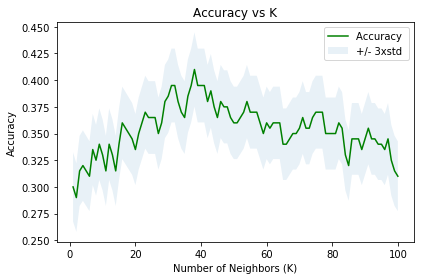

In [51]:
plt.title('Accuracy vs K')
plt.plot(range(1,k_max + 1),mean_acc,'g')
plt.fill_between(range(1,k_max + 1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The maximum accuracy can be found to be

In [52]:
print('Max Accuracy: {}, K={}'.format(max(mean_acc),mean_acc.argmax() + 1))

Max Accuracy: 0.41, K=38


##### Test Sample

It can be noted that the accuracy and optimal value varies based on the `random_state` parameter in the `train_test_split` function used when doing the test/train split

##### Retrain with All Data

We can retrain the model to use all the data at the determined optimal value and look at the in-sample accuracy

In [53]:
k = mean_acc.argmax()
knn = knn_classifier(n_neighbors=k)
knn.fit(X, Y)
print("In-Sample Accuracy: ", metrics.accuracy_score(Y, knn.predict(X)))

In-Sample Accuracy:  0.425


### Decision Trees

Decision Trees allow us to make use of discrete and continuous predictors to find a discrete target

Decision trees test a condition and branch off based on the result, eventually leading to a specific outcome/decision

#### Algorithm

1. Choose a dataset
2. Calculate the significance of an attribute in splitting the data
3. Split the data based on the value of the attribute
4. Go to **1**

We aim to have resulting nodes that are high in purity. A higher purity increases predictiveness/significance

Recursive partitining is used to decrease the impurity/entropy in the resulting nodes

Entropy is a measurement of randomness

If samples are equally mixed, the entropy is 1, if the samples are pure, the entropy is 1

$$
Entropy(v)=P(v)-log(P(v))
$$

The best tree is the one that results in the most information gain after the split

$$
Gain(S,A) = Entropy(S)-\Sigma_v\frac{|S_v|}{|S|}Entropy(S_v)
$$            

#### Lab

##### Import Libraries

In [54]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

##### Import Data

In [55]:
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')

In [56]:
print(df.shape)
df.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


##### Split X and Y Values

In [57]:
X_headers = ['Age','Sex','BP','Cholesterol','Na_to_K']
X = df[X_headers]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [58]:
Y = df[['Drug']]
Y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


##### Create Numeric Variables

We need to get numeric variables for X as `sklearn` does not support string categorization (according to the guy in the course anyway)

In [59]:
from sklearn import preprocessing

In [60]:
X_arr = np.array(X)

encoder = preprocessing.LabelEncoder()
encoder.fit(['F','M'])
X_arr[:,1] = encoder.transform(X_arr[:,1])

encoder.fit(['LOW','NORMAL','HIGH'])
X_arr[:,2] = encoder.transform(X_arr[:,2])

encoder.fit(['NORMAL','HIGH'])
X_arr[:,3] = encoder.transform(X_arr[:,3])

print(X_arr[0:5])

[[23 0 0 0 25.355]
 [47 1 1 0 13.093]
 [47 1 1 0 10.113999999999999]
 [28 0 2 0 7.797999999999999]
 [61 0 1 0 18.043]]


In [61]:
X_encoded = pd.DataFrame(data=X_arr, columns=X_headers)
X_encoded.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


##### Train/Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size = 0.3)
print('Training: X : {}, Y : {}'.format(X_train.shape,Y_train.shape))
print('Testing: X : {}, Y : {}'.format(X_test.shape,Y_test.shape))

Training: X : (140, 5), Y : (140, 1)
Testing: X : (60, 5), Y : (60, 1)


##### Decision Tree

In [64]:
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
drug_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
drug_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Prediction

In [66]:
Y_predicted = drug_tree.predict(X_test)

In [67]:
print(Y_predicted[0:5])
print(Y_test[0:5])

['drugA' 'drugX' 'drugX' 'drugX' 'drugY']
      Drug
137  drugA
27   drugX
182  drugX
43   drugX
185  drugY


##### Evaluation

In [68]:
from sklearn import metrics

In [69]:
print('Decision Tree Accuracy: ', metrics.accuracy_score(Y_test, Y_predicted))

Decision Tree Accuracy:  0.966666666667


##### Visalization

In [70]:
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [71]:
dot_data = StringIO()
filename = 'drug_decision_tree.png'
feature_names = X_headers
target_names = df['Drug'].unique().tolist()

In [72]:
out = tree.export_graphviz(drug_tree, 
                           feature_names=feature_names, 
                           out_file=dot_data, 
                           class_names=target_names, 
                           filled=True, 
                           special_characters=True, 
                           rotate=False)

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

True

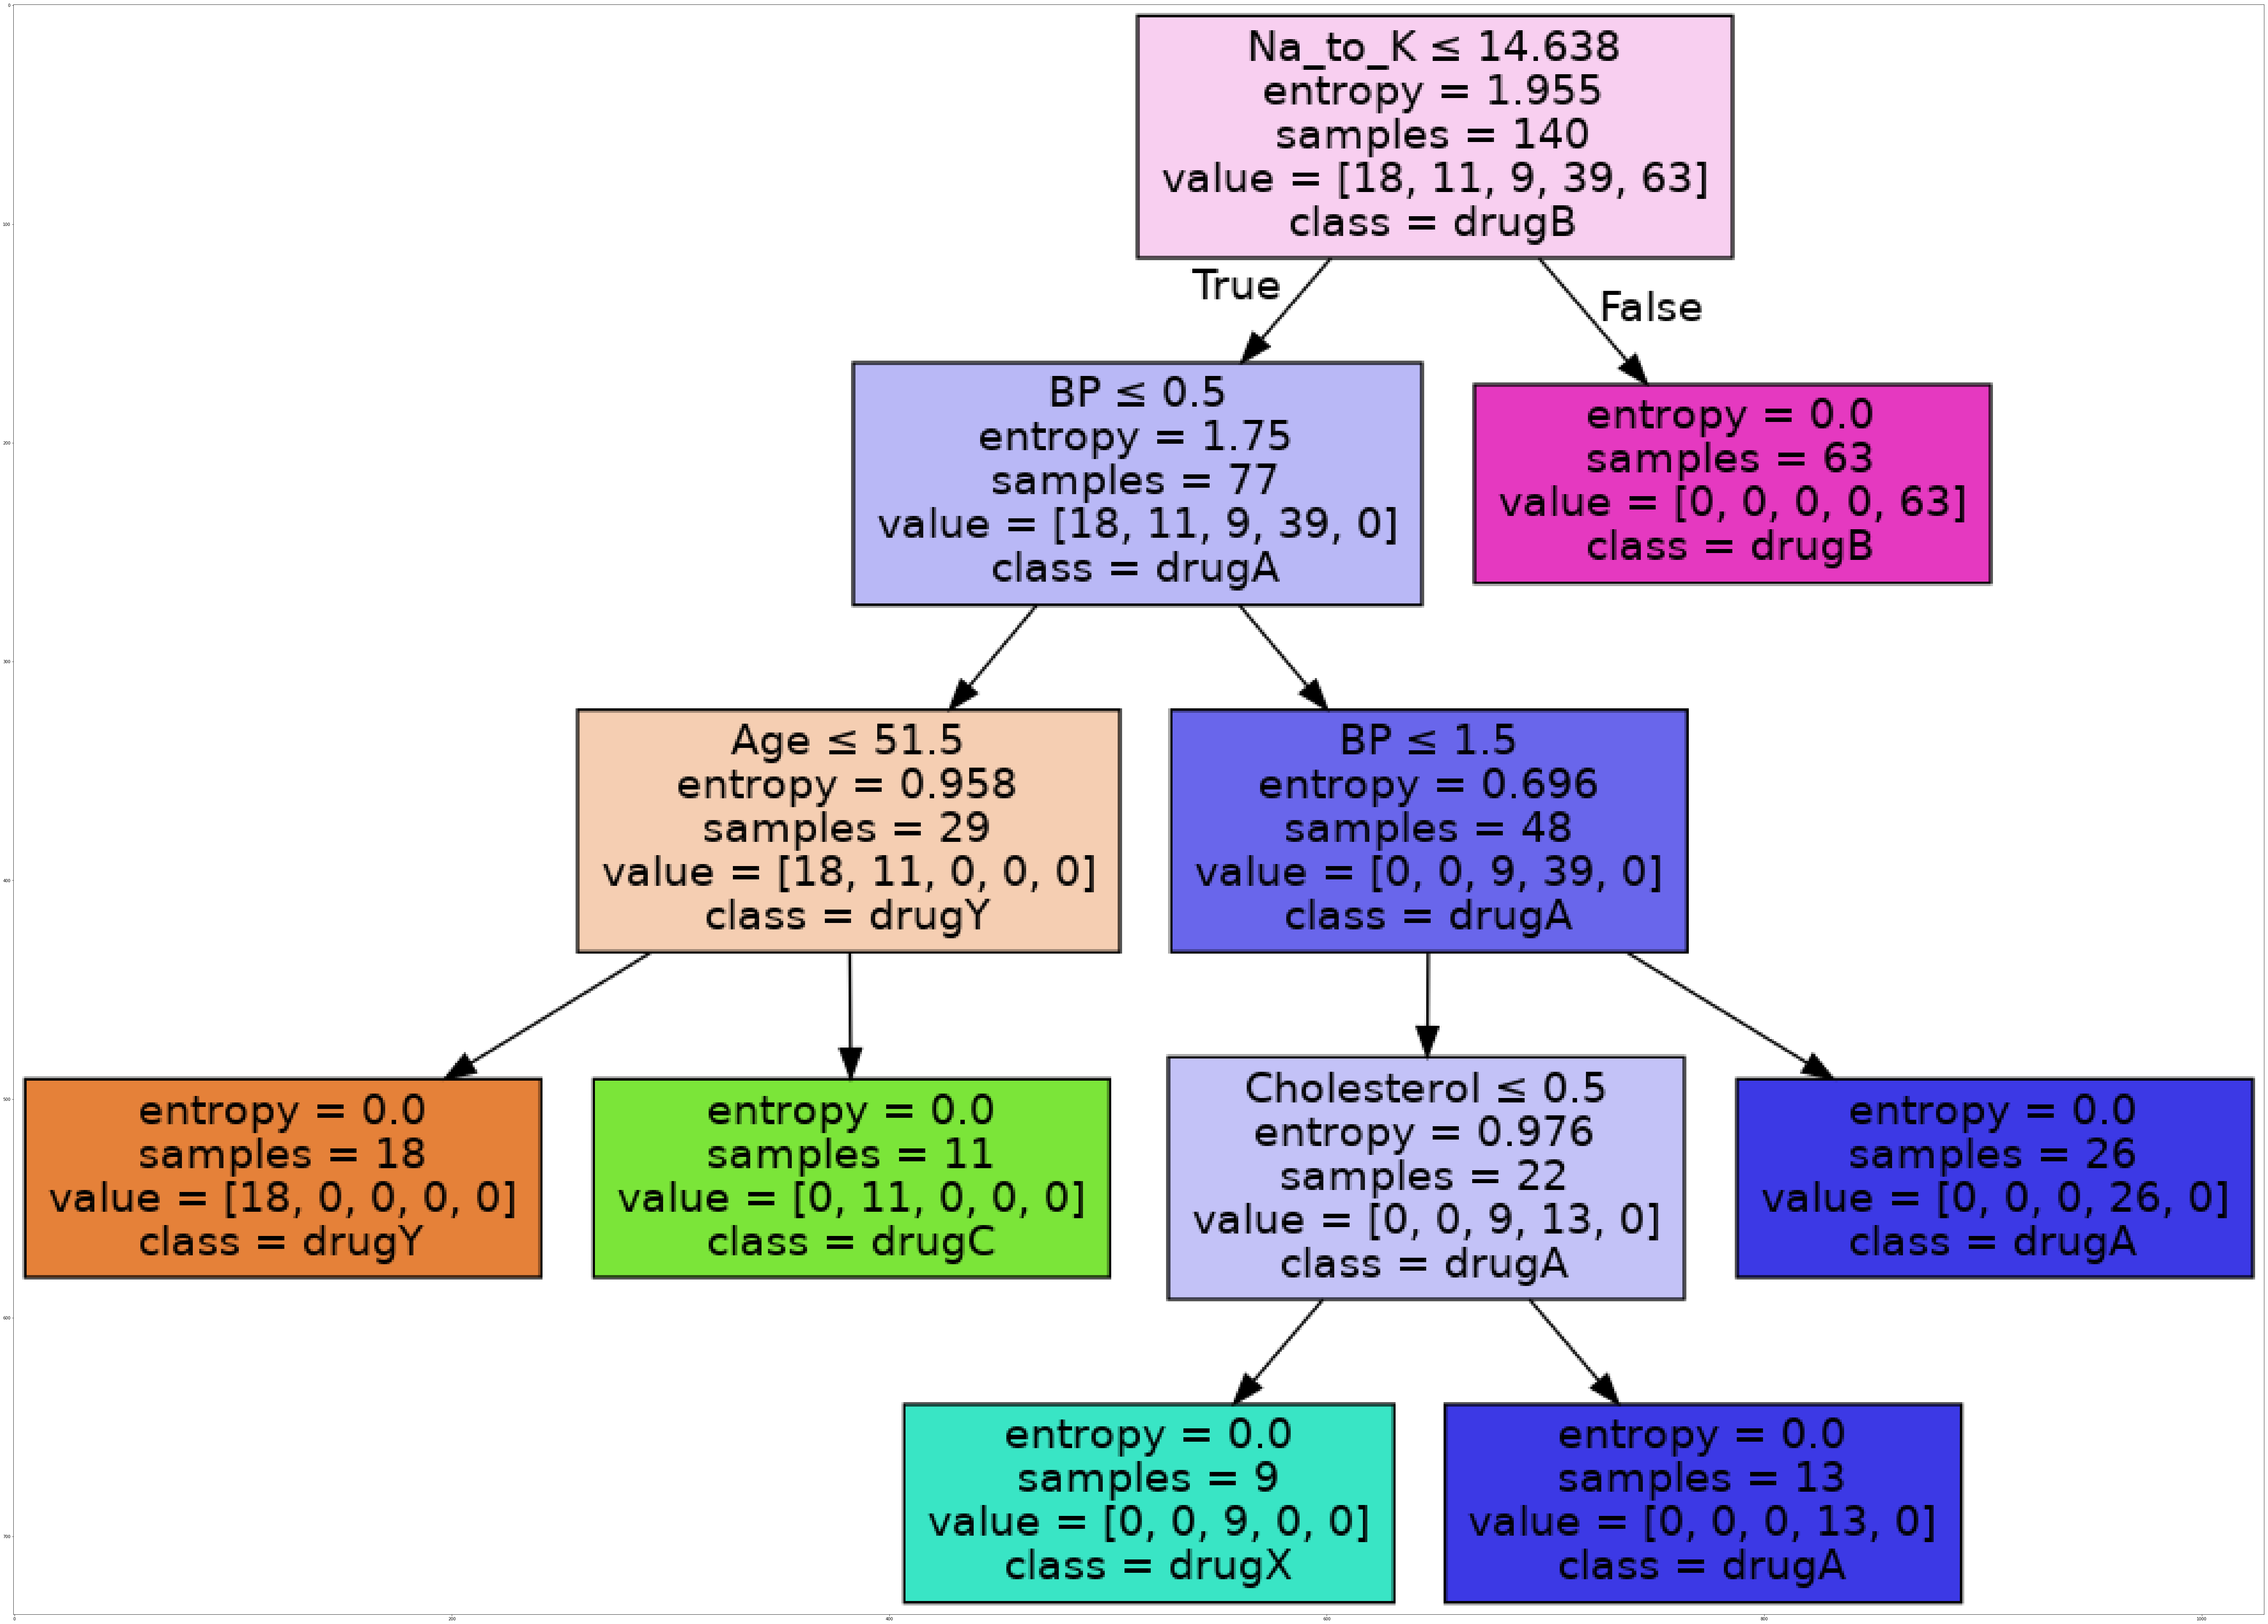

In [74]:
img = mpimg.imread(filename)
plt.figure(figsize=(100, 100))
plt.imshow(img, interpolation='nearest')
plt.show()